Examen Omar Damian Piuselli

In [152]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [5, 3]

### EJ2

In [153]:
def f(x):
    return 2 * x - 1


X = np.random.uniform(low=0, high=1, size=100)
Z = st.skewnorm.rvs(a=10, size=100)
Y = f(X) + Z

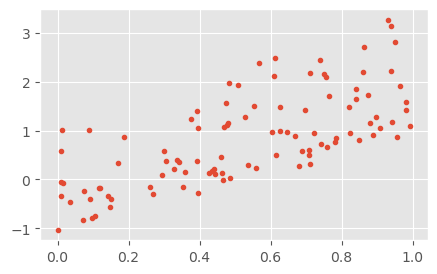

In [154]:
plt.plot(X, Y, ".")

In [155]:
# A) realizar un ajusto lineal con X como variable independiente y Y como dependiente

X_diseño = np.column_stack((np.ones(100), X))

beta_hat = (
    np.linalg.inv(X_diseño.T @ X_diseño) @ X_diseño.T @ Y
)  # estimadores de MLE/cuadrados minimos
print(beta_hat)  # B0, B1

[-0.33165984  2.2248819 ]


In [156]:
def sample_beta():
    X = np.random.uniform(low=0, high=1, size=100)
    Z = st.skewnorm.rvs(a=10, size=100)
    Y = f(X) + Z

    X_diseño = np.column_stack((np.ones(100), X))

    beta_hat = np.linalg.inv(X_diseño.T @ X_diseño) @ X_diseño.T @ Y

    return beta_hat


sampled_betas = np.array([sample_beta() for _ in range(30)])

Text(0.5, 0, 'B0_hat')

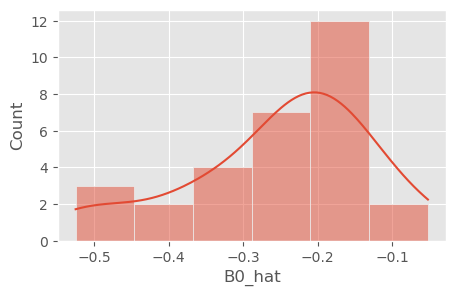

In [157]:
sns.histplot(sampled_betas[:, 0], kde=True)
plt.xlabel("B0_hat")

Text(0.5, 0, 'B1_hat')

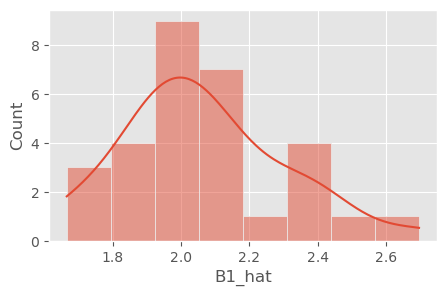

In [158]:
sns.histplot(sampled_betas[:, 1], kde=True)
plt.xlabel("B1_hat")

Las distribuciones de B1_hat y B0_hat tienen distribucion normal con media igual a B1 y B0 respectivamente y varianza igual a sigma^2 / sumatoria de (xi - x_barra)^2 cuando se cumplen las hipotesis del modelo lineal.

En este caso no se cumple la hipotesis de que los epsilons (Z en este caso) tengan media 0, debido a que Z tiene distribucion skewnormal con a != 0.

Sin embargo en las distribuciones empiricas parecen aproximadamente normales, aunque no se aprecia muy bien la distribucion debido a que el numero de muestras es pequeño (m=30), pero si se aumenta el numero de muestras se puede observar que la distribucion es aproximadamente normal.

Como el Z tiene media distinta de 0, espero que eso introduzca un sesgo en la estimacion de B_0, esto parece evidenciarse en el histograma con m = 3000.

Text(0.5, 0, 'B0_hat')

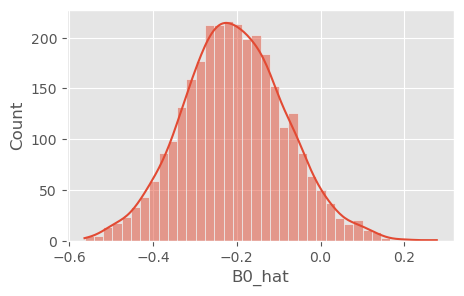

In [159]:
sampled_betas = np.array([sample_beta() for _ in range(3000)])

sns.histplot(sampled_betas[:, 0], kde=True)
plt.xlabel("B0_hat")

Text(0.5, 0, 'B1_hat')

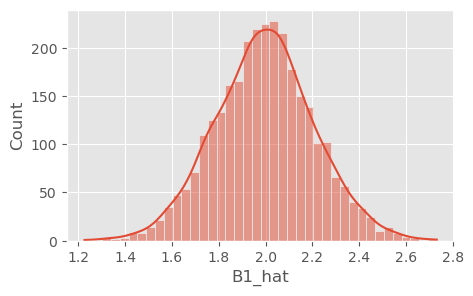

In [160]:
sns.histplot(sampled_betas[:, 1], kde=True)
plt.xlabel("B1_hat")

###EJ3

In [161]:
X = np.random.uniform(low=0, high=30, size=100)  # tiempo

B0 = 5
B1 = -0.1  # decrece la prob de likes con el tiempo
mu = np.exp(B0 + B1 * X)  # media de la distribucion en funcion del tiempo

Y = st.poisson.rvs(mu=mu)

Text(0, 0.5, 'likes')

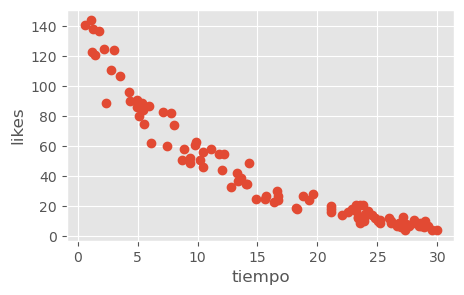

In [162]:
plt.plot(X, Y, "o")
plt.xlabel("tiempo")
plt.ylabel("likes")

Para el modelo GLM utilizando la distribucion de poisson utilizo la funcion de link canonica.

theta = ln(mu) --> mu = exp(theta)

Por lo tanto, si el termino lineal se denomina eta, al usar la funcion de link canonico queda

theta = eta --> mu = exp(eta)

Para obtener los MLE de los coeficientes de regresion necesito buscar un maximo de la log-likelihood, utilizando scipy.optimize.

OBS:  En la distrib de poisson, dispersion = 1. 


In [163]:
def poisson_log_likelihood(y, mu):  # a menos de una constante
    return np.sum(y * np.log(mu) - mu)


def mle_poisson(beta, X, y):  # ln(mu) = eta = B0  + B1*X
    mu = np.exp(np.dot(X, beta))  # funcion link  ln(mu)=theta
    return -poisson_log_likelihood(
        y, mu
    )  # signo menos para poder usar scipy.optimize.minimize

In [164]:
from scipy.optimize import minimize

X_diseño = np.column_stack((np.ones(len(X)), X))

beta_init = np.zeros(2)

res = minimize(mle_poisson, beta_init, args=(X_diseño, Y), method="BFGS")

In [165]:
print(f"B0: {res.x[0]:.4f}, B1: {res.x[1]:.4f}")

B0: 5.0036, B1: -0.1015


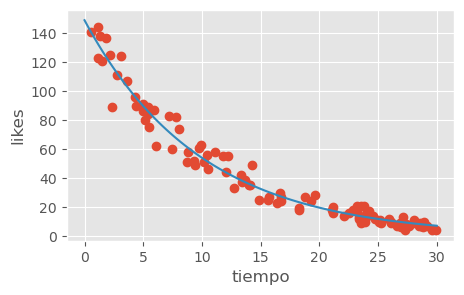

In [166]:
plt.plot(X, Y, "o")
plt.xlabel("tiempo")
plt.ylabel("likes")

X_linspace = np.linspace(0, 30, 100)
plt.plot(X_linspace, np.exp(res.x[0] + res.x[1] * X_linspace), "-")

Para encontrar el error std de los coeficientes calculo la matriz de informacion de fischer.



In [167]:
# matriz de pesos, como use la variable canonica  (1/ dEta/dmu)
W = np.diag(np.exp(np.dot(X_diseño, res.x)))
# informacion de fisher (dispersion = 1 para poisson)
fischer_information = np.dot(X_diseño.T, np.dot(W, X_diseño))
covariance_matrix = np.linalg.inv(fischer_information)  # matriz de covarianza
covariance_matrix

array([[ 5.55885117e-04, -3.65763347e-05],
       [-3.65763347e-05,  4.16654428e-06]])

In [168]:
standard_errors = np.sqrt(np.diag(covariance_matrix))
standard_errors

array([0.02357722, 0.00204121])

In [169]:
print(f"SE B0: {standard_errors[0]:.4f}, SE B1: {standard_errors[1]:.4f}")

SE B0: 0.0236, SE B1: 0.0020


###Ej4 aux

In [176]:
st.binom(1000, 0.5).ppf(0.95)

526.0

In [182]:
1 - st.binom(1000, 0.5).cdf(540)

0.005194065783077906